First few rows of the dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4    

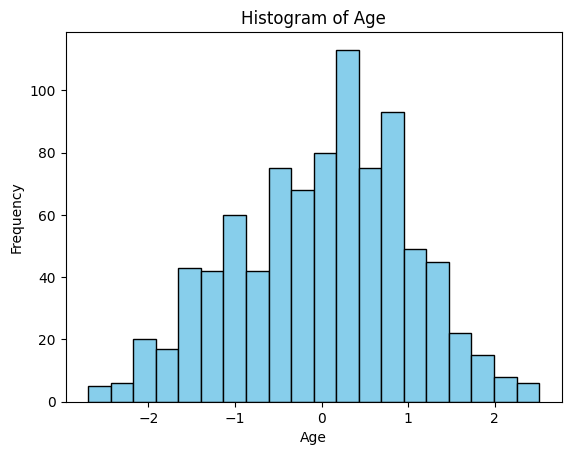


Correlation matrix:
                id       age  trestbps      chol    thalch   oldpeak       num
id        1.000000  0.270719  0.075241 -0.367801 -0.456139  0.092946  0.316933
age       0.270719  1.000000  0.245465 -0.099006 -0.368423  0.246445  0.333643
trestbps  0.075241  0.245465  1.000000  0.086047 -0.098932  0.149784  0.100738
chol     -0.367801 -0.099006  0.086047  1.000000  0.228788  0.017273 -0.258788
thalch   -0.456139 -0.368423 -0.098932  0.228788  1.000000 -0.164296 -0.362810
oldpeak   0.092946  0.246445  0.149784  0.017273 -0.164296  1.000000  0.422114
num       0.316933  0.333643  0.100738 -0.258788 -0.362810  0.422114  1.000000


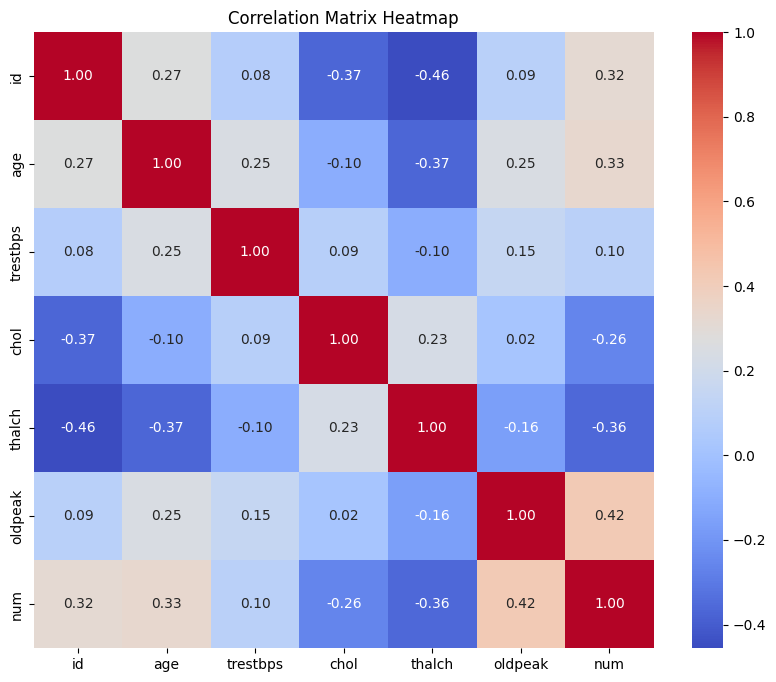

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Load the dataset from CSV file
df = pd.read_csv('/content/heart_disease_uci.csv')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values before data imputation:")
print(df.isnull().sum())

# Data Imputation: Let's handle missing values by replacing them with the mean of numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Display missing values after data imputation
print("\nMissing values after data imputation:")
print(df.isnull().sum())

# Handling outliers: Let's remove outliers using z-score
z_scores = stats.zscore(df.select_dtypes(include='number'))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

# Check for rows removed due to outliers
print("\nRows removed due to outliers:", sum(~filtered_entries))

# Data normalization: Let's scale numerical features to have mean=0 and variance=1
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include='number').columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Additional data cleaning steps:
# Convert categorical columns to categorical data type
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')
df['dataset'] = df['dataset'].astype('category')

# Perform further analysis or processing:
# Summary statistics by group (e.g., by 'sex' or 'cp')
summary_by_sex = df.groupby('sex').describe()
summary_by_cp = df.groupby('cp').describe()

# Visualization (e.g., histogram of age)
import matplotlib.pyplot as plt
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
# Exclude non-numeric columns before calculating correlation matrix
numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Heatmap of correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Perform further analysis or processing as required...
